# Load Libraries

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Load the data

In [2]:
animals=pd.read_csv(r"E:\zoo.csv")

In [3]:
animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
animals_class=pd.read_csv(r"E:\class.csv")

In [5]:
animals_class.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


# Clean the data

In [6]:
an=list(animals.columns)
an.remove("class_type")
an.remove("animal_name")
print(an)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


# Split the data 

In [37]:
x = animals.iloc[:,1:-1]
y= animals.iloc[:, -1]

In [38]:
y.shape

(101,)

In [39]:
x.shape

(101, 16)

# Creating a test set and a training set

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)


In [13]:
x_train.shape

(70, 16)

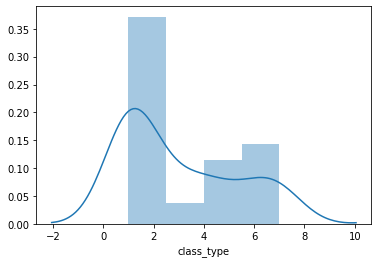

In [20]:
sns.distplot(y_train)

# Logistic Regression Model

In [21]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model1.score(x_train,y_train)

0.9857142857142858

In [23]:
y_pred1=model1.predict(x_test)

In [24]:
model1.score(x_test,y_pred1)

1.0

In [43]:
cm=confusion_matrix(y_test,y_pred1)
print(cm)

[[11  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0]]


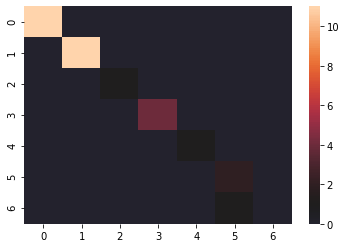

In [44]:
sns.heatmap(cm,center=True)
plt.show()

# SVC Model

In [27]:
model2=SVC(kernel = "rbf", C = 1.0, gamma = 0.1)
model2.fit(x_train,y_train)
model2.score(x_train,y_train)

0.9571428571428572

In [29]:
y_pred2=model2.predict(x_test)

In [30]:
model2.score(x_test,y_pred2)

1.0

# DecisionTree Model

In [32]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
model3.score(x_train,y_train)

1.0

In [33]:
y_pred3=model3.predict(x_test)
model3.score(x_test,y_pred3)

1.0

# RandomForest Model

In [35]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
model4.score(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [36]:
y_pred4=model4.predict(x_test)
model4.score(x_test,y_pred4)

1.0